<a href="https://colab.research.google.com/github/sovunia-hub/machine-learning/blob/main/Mnist_with_Ensembles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.8 MB/s eta 0:00:00


In [2]:
from sklearn.metrics import r2_score, f1_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV, train_test_split
import sklearn.datasets as datasets

import catboost as cb

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

В качестве задачи к данному занятию будет рассмотрена задача классификации рукописных цифр из встроенной таблицы данных MNIST в google.colab

In [3]:
data_train_classifier = pd.read_csv("/content/sample_data/mnist_train_small.csv")
data_test_classifier = pd.read_csv("/content/sample_data/mnist_test.csv")

In [4]:
data_train_classifier.shape

(19999, 785)

In [5]:
data_test_classifier.shape

(9999, 785)

In [6]:
X_train = data_train_classifier.iloc[:, 1:]
Y_train = data_train_classifier.iloc[:, 0] #хранится класс
X_test = data_test_classifier.iloc[:, 1:]
Y_test = data_test_classifier.iloc[:, 0]

In [7]:
Y_train.unique()

array([5, 7, 9, 2, 0, 6, 8, 3, 4, 1])

In [8]:
Y_test.unique()

array([2, 1, 0, 4, 9, 5, 6, 7, 3, 8])

In [9]:
X_train.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
X_test.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
X_train.iloc[:, 100].unique()

array([  0, 246,  63, 175, 254,  30,   2, 118, 100, 128,  31,  17, 221,
       233, 126, 255, 105, 182, 165, 205, 231, 125,  87,  86, 253, 214,
       119, 203,   4,  84, 139, 215,  76, 187, 236,  57, 226,  79, 229,
       252, 200,  77,  11,  92,  54, 109, 102,  22,  49,  97, 178, 154,
       213, 157,   8, 130, 166, 138, 250,  82, 193, 155, 123,  29, 227,
        26, 156, 153,  51, 247, 245,  42, 160, 244, 142,  27,  24,  21,
       167, 238,  64, 168, 191,  61,  47, 164,  85, 145,  67, 206, 240,
       249, 137,  23,   3,  89, 132, 136,  60,  25,  71, 131, 185, 170,
       180, 111, 209, 207,  39,  37, 184, 114, 190,  65, 212, 211, 234,
       135, 152,  52, 188, 158, 159, 117, 204, 113,   9,  14,  53,  19,
       218, 186,  28,  18, 197,  33, 235, 176, 174,  70, 172,  98, 179,
        10, 149, 148,  15,  12, 133, 230,  38, 242, 192,  50, 196,   6,
         7, 140,  83,  44, 169,  13, 141, 237, 129,  36,  68,  40, 219,
       183, 216,  66, 106, 144, 222,  16,  34, 241,  93, 239,  4

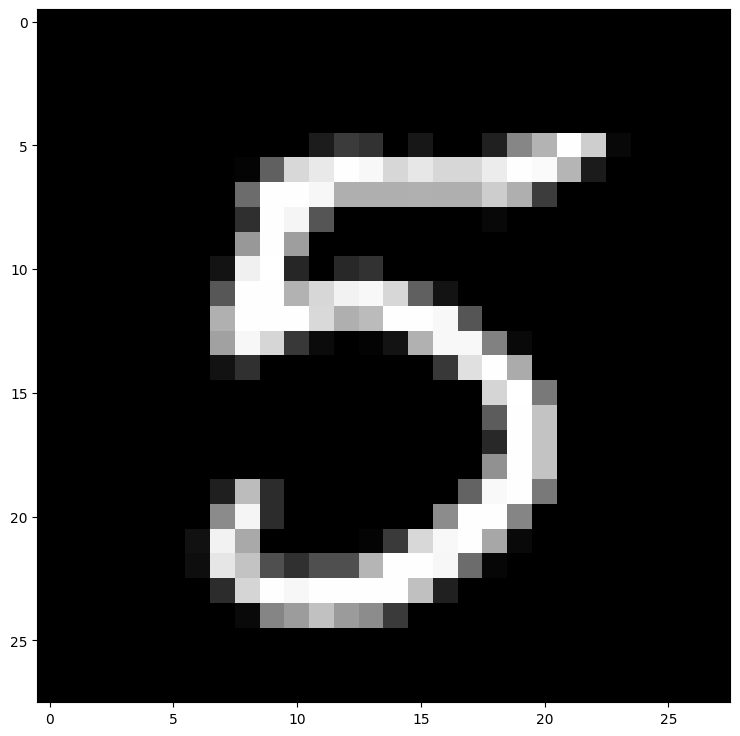

In [12]:
plt.figure(figsize=(9, 9))
plt.imshow(np.array(X_train.iloc[0, :]).reshape((28, 28)),
           cmap = "gray")

# **Классификация**

## **Дерево решений**

In [13]:
model_DT_clf = tree.DecisionTreeClassifier(max_depth=15, min_samples_leaf=4)
model_DT_clf.fit(np.array(X_train), np.array(Y_train))

DecisionTreeClassifier(max_depth=15, min_samples_leaf=4)

In [14]:
preds_DT_clf = model_DT_clf.predict(np.array(X_test))

In [15]:
preds_train_DT_clf = model_DT_clf.predict(X_train)
print(classification_report(Y_train, preds_train_DT_clf))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1962
           1       0.96      0.98      0.97      2243
           2       0.91      0.94      0.92      1989
           3       0.94      0.92      0.93      2021
           4       0.94      0.93      0.94      1924
           5       0.92      0.91      0.92      1761
           6       0.97      0.94      0.95      2038
           7       0.96      0.95      0.95      2126
           8       0.93      0.91      0.92      1912
           9       0.93      0.93      0.93      2023

    accuracy                           0.94     19999
   macro avg       0.94      0.94      0.94     19999
weighted avg       0.94      0.94      0.94     19999



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [16]:
model_DT_clf.get_depth()

15

In [17]:
model_DT_clf.get_n_leaves()

911

In [18]:
print(confusion_matrix(Y_test, preds_DT_clf))

[[ 913    1   13    6    6   14    9    8    6    4]
 [   3 1074   10    9    7    0    4    5   20    3]
 [  31   17  845   24   17   10   12   34   31   11]
 [  19    9   38  810    4   49    5   17   35   24]
 [   4   10   14    8  832   11    7    6   29   61]
 [  29   12   20   39   20  692   21   17   17   25]
 [  30    5   32    9   25   23  812    3   15    4]
 [   7   14   25   16    9    4    1  917    7   27]
 [  17   21   44   29   23   47   16   11  743   23]
 [  13    4   11   17   37   13    6   28   41  839]]


In [19]:
f1_score(Y_test, preds_DT_clf, average="macro")

0.8456094900130646

Model DT thinks this is number  [8]


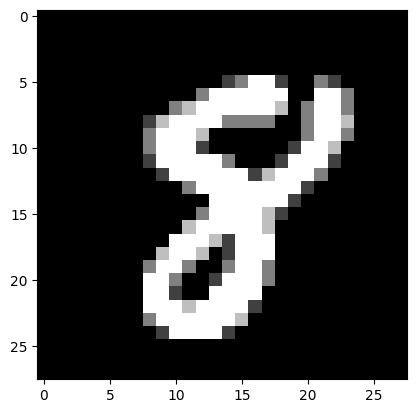

In [20]:
# Число отвечает за то, какая строка из таблицы данных будет выдана в модель
# 0 и до 9998
num_of_test_row = 5002

sample_number_from_test = np.array(X_test.iloc[num_of_test_row, :]).reshape(1, -1)

pred_test = model_DT_clf.predict(sample_number_from_test)

plt.imshow(np.array(X_test.iloc[num_of_test_row, :]).reshape((28, 28)),
           cmap="gray")

print("Model DT thinks this is number ", pred_test)

In [21]:
# Установленные параметры для обучения дерева
print(model_DT_clf.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 15, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}


In [22]:
# Количество листьев и глубина дерева
print(model_DT_clf.get_n_leaves())
print(model_DT_clf.get_depth())

911
15


In [23]:
model_DT_gscv = tree.DecisionTreeClassifier()
params_grid = {
    "ccp_alpha": [0.0],
    "class_weight": [None],
    "criterion": ['gini'],
    "max_depth": [12, 15, 18],
    "max_features": [None],
    "max_leaf_nodes": [None],
    "min_impurity_decrease": [0.0],
    "min_samples_leaf": [1, 5, 10],
    "min_samples_split": [2, 12, 22],
    'min_weight_fraction_leaf': [0.0],
    'random_state': [None],
    'splitter': ['best']
    }

grid_search_DT_clf = GridSearchCV(estimator=model_DT_gscv,
                                  param_grid=params_grid,
                                  scoring="f1_macro",
                                  cv = 4)

In [24]:
grid_search_DT_clf.fit(np.array(X_train), np.array(Y_train))
preds_train = grid_search_DT_clf.predict(np.array(X_train))
print("Оценка классификации на обучении ", f1_score(Y_train, preds_train, average="macro"))

Оценка классификации на обучении  0.9648532248658901


In [25]:
grid_search_DT_clf.best_estimator_

DecisionTreeClassifier(max_depth=12)

In [26]:
preds_DT_gscv = grid_search_DT_clf.predict(np.array(X_test))

In [27]:
f1_score(Y_test, preds_DT_gscv, average="macro")

0.8430396825061901

In [28]:
print(tree.export_text(grid_search_DT_clf.best_estimator_))

|--- feature_409 <= 0.50
|   |--- feature_434 <= 0.50
|   |   |--- feature_455 <= 0.50
|   |   |   |--- feature_352 <= 2.50
|   |   |   |   |--- feature_518 <= 2.00
|   |   |   |   |   |--- feature_598 <= 8.00
|   |   |   |   |   |   |--- feature_182 <= 9.50
|   |   |   |   |   |   |   |--- feature_543 <= 37.00
|   |   |   |   |   |   |   |   |--- class: 7
|   |   |   |   |   |   |   |--- feature_543 >  37.00
|   |   |   |   |   |   |   |   |--- feature_654 <= 9.50
|   |   |   |   |   |   |   |   |   |--- feature_157 <= 34.00
|   |   |   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |   |   |   |--- feature_157 >  34.00
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_654 >  9.50
|   |   |   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |   |--- feature_182 >  9.50
|   |   |   |   |   |   |   |--- feature_214 <= 96.00
|   |   |   |   |   |   |   |   |--- feature_240 <= 46.50
|   |   |   |   |   |   |   | 

## **Случайный лес**

In [29]:
model_RF_clf = ensemble.RandomForestClassifier()
model_RF_clf.fit(np.array(X_train), np.array(Y_train))
preds_RF_clf = model_RF_clf.predict(np.array(X_test))
print(confusion_matrix(Y_test, preds_RF_clf))

[[ 969    0    0    1    0    3    4    1    2    0]
 [   0 1123    1    4    0    2    3    0    1    1]
 [   6    0  991    9    4    0    5   11    5    1]
 [   1    0   13  956    0   13    1   11   10    5]
 [   1    0    2    0  947    0    6    0    4   22]
 [   7    2    1   12    1  845    9    3    8    4]
 [  12    3    0    1    4    3  933    0    1    1]
 [   2    7   27    2    4    0    0  963    5   17]
 [   6    1    7    9    9    7    6    4  913   12]
 [   7    6    3   13   15    3    1    3    6  952]]


In [30]:
print(f1_score(Y_test, preds_RF_clf, average = "macro"))

0.9589443698730648


In [31]:
model_RF_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## **Градиентный бустинг**



In [32]:
model_catboost_clf = cb.CatBoostClassifier(iterations=2000,
                                           task_type="GPU",
                                           devices='0')
model_catboost_clf.fit(X_train, Y_train)

Learning rate set to 0.067132
0:	learn: 2.0922226	total: 95.6ms	remaining: 3m 11s
1:	learn: 1.9357605	total: 181ms	remaining: 3m
2:	learn: 1.8037320	total: 235ms	remaining: 2m 36s
3:	learn: 1.7016310	total: 289ms	remaining: 2m 23s
4:	learn: 1.6026600	total: 342ms	remaining: 2m 16s
5:	learn: 1.5277020	total: 381ms	remaining: 2m 6s
6:	learn: 1.4571695	total: 415ms	remaining: 1m 58s
7:	learn: 1.3935863	total: 450ms	remaining: 1m 52s
8:	learn: 1.3270080	total: 485ms	remaining: 1m 47s
9:	learn: 1.2706133	total: 521ms	remaining: 1m 43s
10:	learn: 1.2141700	total: 556ms	remaining: 1m 40s
11:	learn: 1.1651476	total: 593ms	remaining: 1m 38s
12:	learn: 1.1238521	total: 630ms	remaining: 1m 36s
13:	learn: 1.0830952	total: 667ms	remaining: 1m 34s
14:	learn: 1.0460662	total: 700ms	remaining: 1m 32s
15:	learn: 1.0093778	total: 734ms	remaining: 1m 31s
16:	learn: 0.9732597	total: 770ms	remaining: 1m 29s
17:	learn: 0.9413279	total: 806ms	remaining: 1m 28s
18:	learn: 0.9107621	total: 842ms	remaining: 1m 

In [33]:
preds_catboost_clf = model_catboost_clf.predict(np.array(X_test), task_type="CPU")
print(confusion_matrix(Y_test, preds_catboost_clf))

[[ 968    0    1    1    0    3    4    1    2    0]
 [   0 1123    3    1    0    0    3    1    4    0]
 [   4    4  995    6    5    1    2    7    7    1]
 [   1    0    6  976    0   11    0   10    4    2]
 [   1    0    3    0  951    0    3    1    5   18]
 [   5    0    0    7    1  856   11    2    7    3]
 [   6    3    0    0    5    4  937    1    2    0]
 [   1    7   19    5    2    0    0  981    0   12]
 [   6    0    2    6    6    3    6    6  930    9]
 [   5    4    1   10    9    3    2    4    5  966]]


In [34]:
print(f1_score(Y_test, preds_catboost_clf, average = "macro"))

0.9681545141676576


# **Регрессия**

## **Дерево решений**

In [35]:
data_regression = pd.read_csv("/content/sample_data/california_housing_train.csv")
test_regression = pd.read_csv("/content/sample_data/california_housing_test.csv")

In [36]:
X_train = data_regression.iloc[:, :-1]
X_test = test_regression.iloc[:, :-1]
Y_train = data_regression.iloc[:, -1]
Y_test = test_regression.iloc[:, -1]

In [37]:
Y_test

,median_house_value
0,344700.0
1,176500.0
2,270500.0
3,330000.0
4,81700.0
...,...
2995,225000.0
2996,237200.0
2997,62000.0
2998,162500.0


In [38]:
model_DT_regr = tree.DecisionTreeRegressor()
model_DT_regr.fit(X_train, Y_train)
preds_DT_regr = model_DT_regr.predict(X_test)
print(r2_score(Y_test, preds_DT_regr))

0.6500068979637663


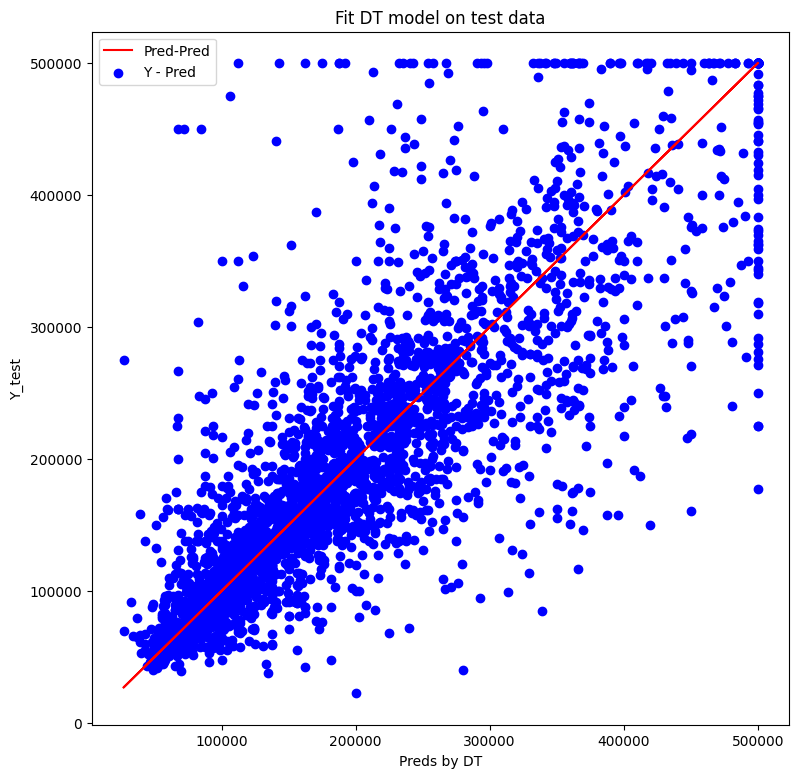

In [39]:
plt.figure(figsize = (9, 9))
plt.plot(preds_DT_regr, preds_DT_regr, c="r", label = "Pred-Pred")
plt.scatter(preds_DT_regr, Y_test, c = "b", label = "Y - Pred")
plt.legend()
plt.title("Fit DT model on test data")
plt.xlabel("Preds by DT")
plt.ylabel("Y_test")
plt.show()

## **Случайный лес**

In [40]:
model_RF_regr = ensemble.RandomForestRegressor(n_estimators=50)
model_RF_regr.fit(X_train, Y_train)
preds_RF_regr = model_RF_regr.predict(X_test)
print(r2_score(Y_test, preds_RF_regr))

0.8098949939734988


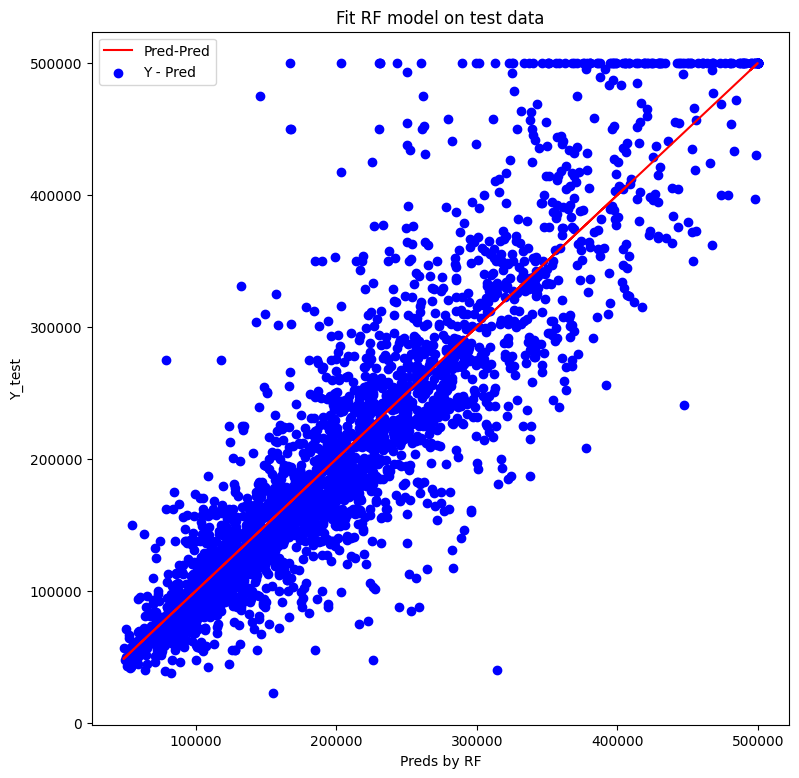

In [41]:
plt.figure(figsize = (9, 9))
plt.plot(preds_RF_regr, preds_RF_regr, c="r", label = "Pred-Pred")
plt.scatter(preds_RF_regr, Y_test, c = "b", label = "Y - Pred")
plt.legend()
plt.title("Fit RF model on test data")
plt.xlabel("Preds by RF")
plt.ylabel("Y_test")
plt.show()

## **Градиентный бустинг**

In [42]:
model_catboost_regr = cb.CatBoostRegressor(iterations=4000,
                                          task_type="GPU",
                                          devices='0', )
model_catboost_regr.fit(X_train, Y_train)

Learning rate set to 0.02559
0:	learn: 114462.6793689	total: 22.1ms	remaining: 1m 28s
1:	learn: 112922.4975515	total: 38.4ms	remaining: 1m 16s
2:	learn: 111464.5751729	total: 55.1ms	remaining: 1m 13s
3:	learn: 110046.8117937	total: 81.7ms	remaining: 1m 21s
4:	learn: 108737.0132086	total: 97.7ms	remaining: 1m 18s
5:	learn: 107380.7261109	total: 114ms	remaining: 1m 15s
6:	learn: 106089.3721864	total: 133ms	remaining: 1m 15s
7:	learn: 104870.4933250	total: 149ms	remaining: 1m 14s
8:	learn: 103678.2335292	total: 165ms	remaining: 1m 13s
9:	learn: 102567.6253239	total: 181ms	remaining: 1m 12s
10:	learn: 101482.6710848	total: 201ms	remaining: 1m 12s
11:	learn: 100412.6201922	total: 216ms	remaining: 1m 11s
12:	learn: 99371.9185865	total: 235ms	remaining: 1m 12s
13:	learn: 98372.7947517	total: 255ms	remaining: 1m 12s
14:	learn: 97429.2208938	total: 272ms	remaining: 1m 12s
15:	learn: 96525.3337670	total: 288ms	remaining: 1m 11s
16:	learn: 95628.6620799	total: 304ms	remaining: 1m 11s
17:	learn: 9

In [43]:
preds_catboost_regr = model_catboost_regr.predict(X_test)
print(r2_score(Y_test, preds_catboost_regr))

0.8204925658564763


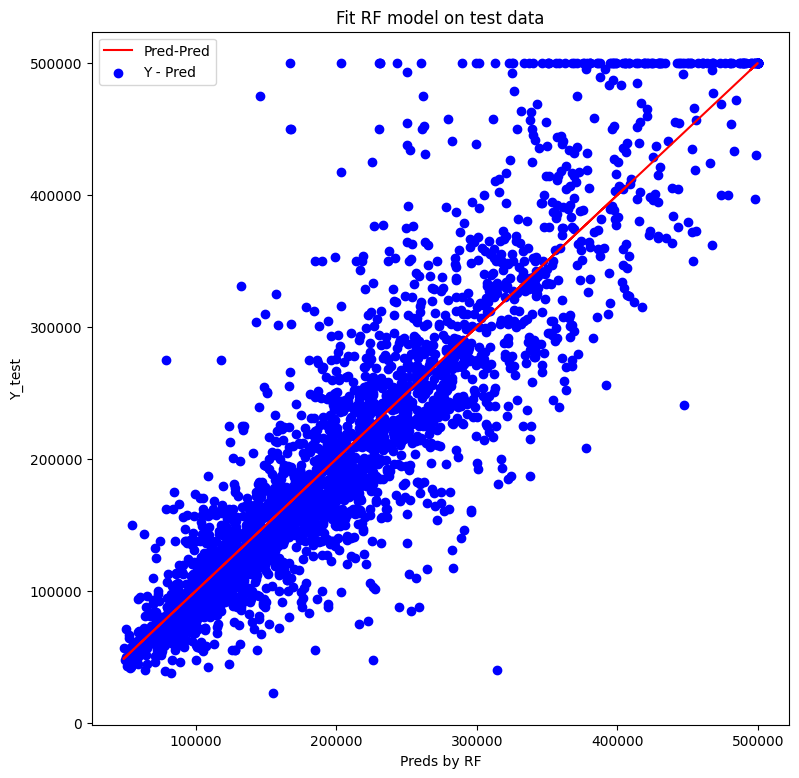

In [44]:
plt.figure(figsize = (9, 9))
plt.plot(preds_RF_regr, preds_RF_regr, c="r", label = "Pred-Pred")
plt.scatter(preds_RF_regr, Y_test, c = "b", label = "Y - Pred")
plt.legend()
plt.title("Fit RF model on test data")
plt.xlabel("Preds by RF")
plt.ylabel("Y_test")
plt.show()